In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns

In [37]:
df=pd.read_csv("Downloads/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [38]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [39]:
Male = pd.get_dummies(df['sex'], drop_first = True)
df = pd.concat([df, Male], axis =1)

In [40]:

df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True


In [41]:
Smoker = pd.get_dummies(df['smoker'], drop_first = True)
df = pd.concat([df, Smoker], axis =1)

In [42]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [43]:
df = df.rename(columns = {'yes':'Smoker'})

,age,sex,bmi,children,smoker,region,charges,male,yes,yes,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,True,True,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,False,False


In [44]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


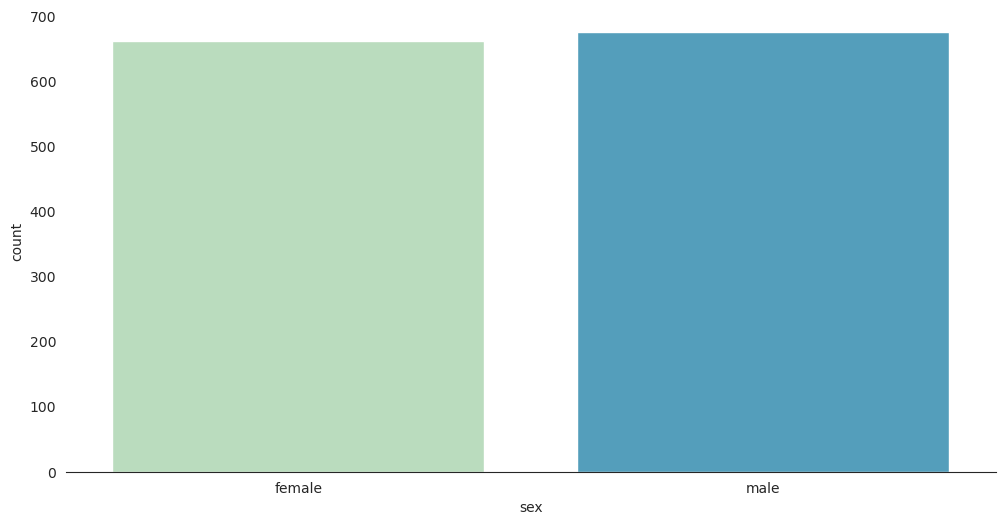

In [45]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.countplot(x='sex', data= df, palette = 'GnBu')
sns.despine(left = True)

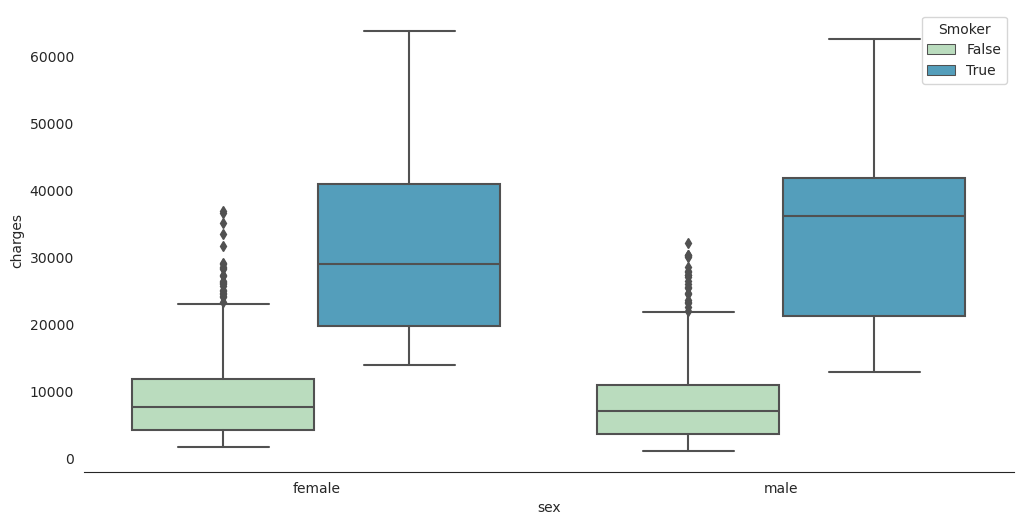

In [46]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.boxplot(x='sex', y= 'charges', data = df, palette ='GnBu', hue = 'Smoker')
sns.despine(left = True)

<Axes: xlabel='age', ylabel='charges'>

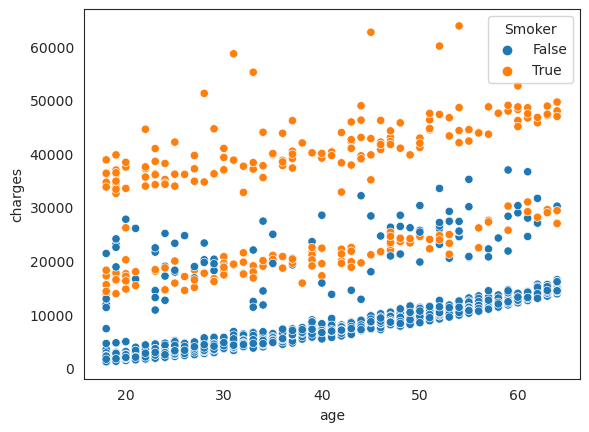

In [51]:
sns.scatterplot(x="age",y="charges",data=df,hue="Smoker")

<Axes: xlabel='bmi', ylabel='charges'>

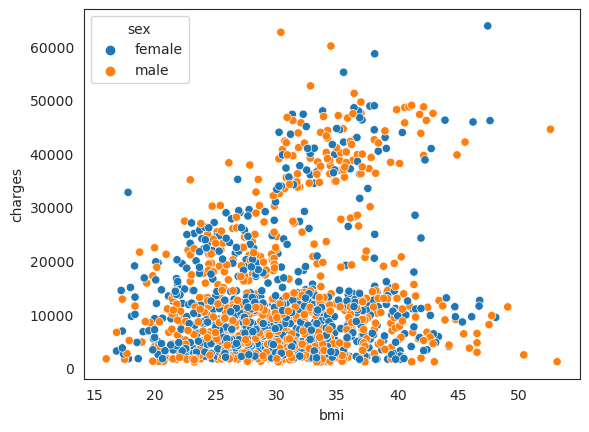

In [52]:
sns.scatterplot(x="bmi",y="charges",data=df,hue="sex")

<Axes: xlabel='bmi', ylabel='charges'>

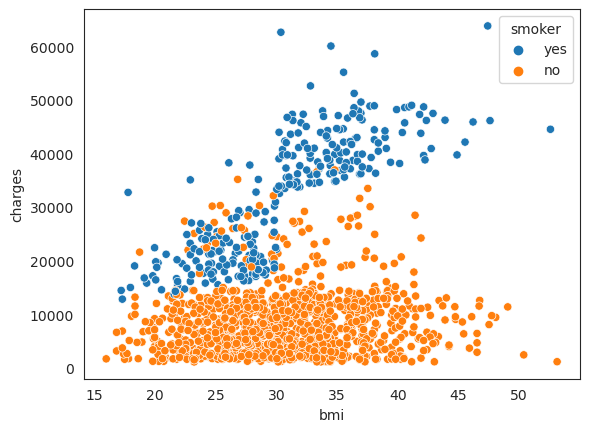

In [53]:
sns.scatterplot(x="bmi",y="charges",data=df,hue="smoker")

<Axes: xlabel='bmi', ylabel='charges'>

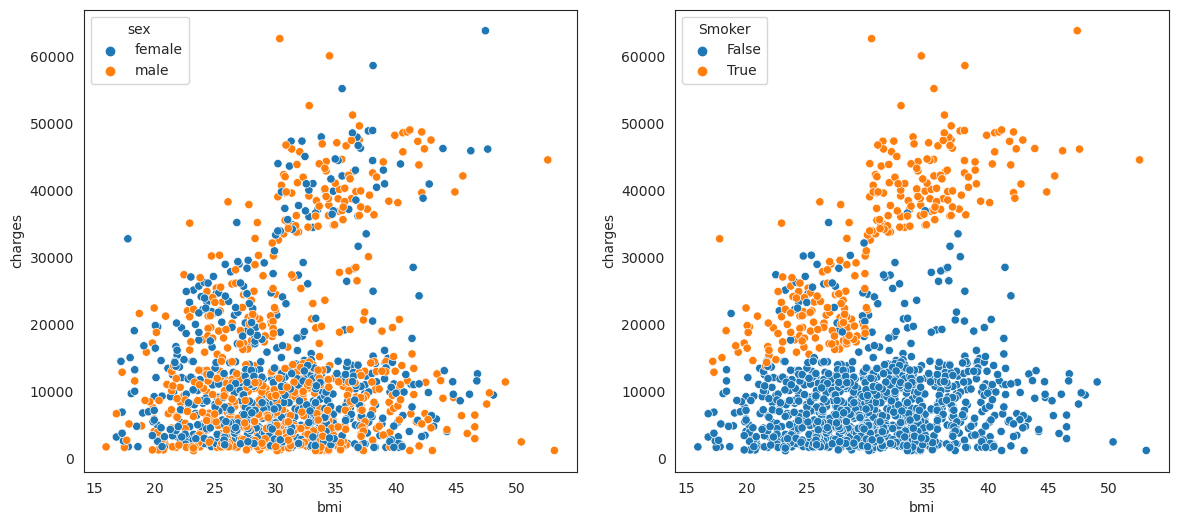

In [54]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex', ax= ax[0])
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker', ax = ax[1])

In [56]:
df=df.drop(["sex","smoker","region"],axis=1)

In [57]:
df

,age,bmi,children,charges,male,Smoker
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [59]:
df['male'] = df['male'].astype(int)
df['Smoker'] = df['Smoker'].astype(int)

In [60]:
df

,age,bmi,children,charges,male,Smoker
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


<Axes: >

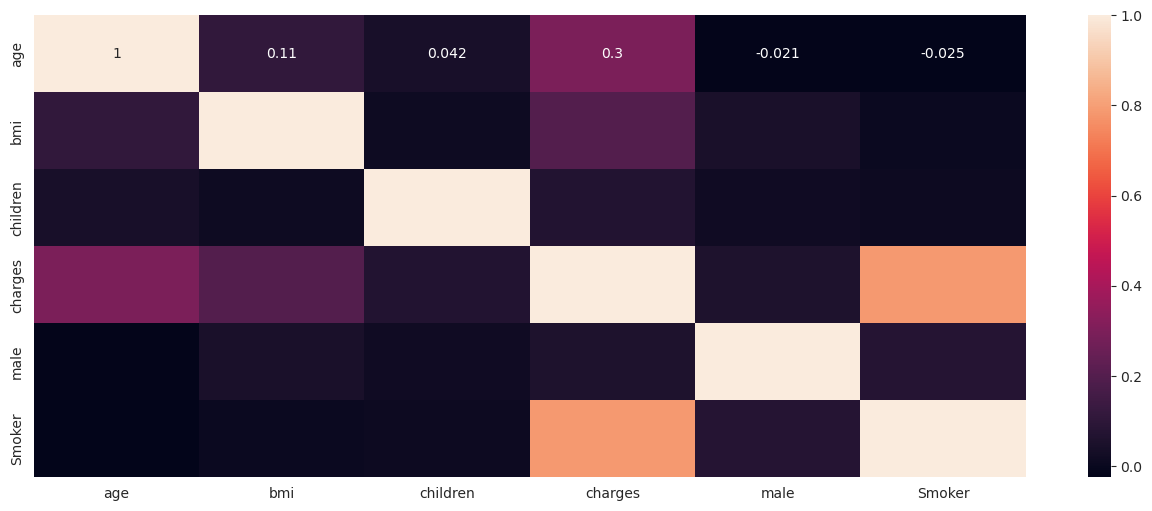

In [61]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True)

In [62]:
x=df.drop("charges",axis=1)
y=df["charges"]

In [63]:
x.head()

,age,bmi,children,male,Smoker
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0


In [64]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4)

In [65]:
xtrain.shape

(802, 5)

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_xtrain = scaler.fit_transform(xtrain)
scaled_xtest = scaler.transform(xtest)

In [68]:
from sklearn.svm import SVR
regressor=SVR()
regressor.fit(scaled_xtrain,ytrain)

SVR()

In [69]:
ypreds=regressor.predict(scaled_xtest)

In [71]:
ytest.shape

(536,)

In [72]:
ypreds.shape

(536,)

In [75]:
np.mean((ytest - ypreds)**2)

147339569.8407873

Text(0, 0.5, 'Actual')

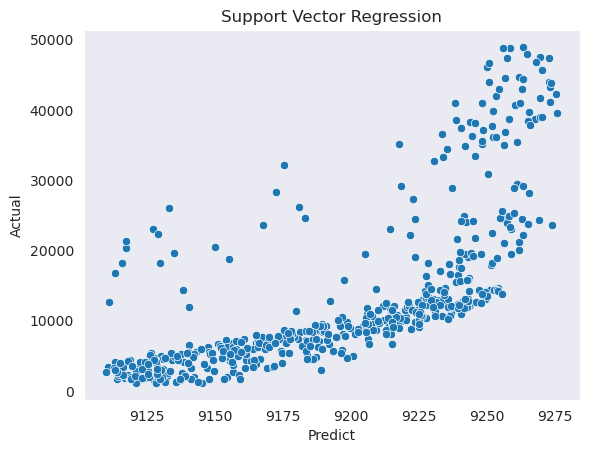

In [79]:
import seaborn as sns

sns.set_style('dark')
f = sns.scatterplot(x=ypreds, y=ytest)
f.set_title('Support Vector Regression')
f.set_xlabel('Predict')
f.set_ylabel('Actual')
